---
title: "Lab 4: Linear Regression the Hard Way"
date: 2022-01-31
---

# Linear Regression from Scratch

## Outcomes

We're going to be working towards building up **our own neural net model from the ground up**. Here's the outline:

1. Single linear regression **this activity**
2. Multiple linear regression
3. Logistic regression
4. Multiple layers

The process of completing this assignment will improve your ability to:

- Describe the parameters and operation of a linear layer.
- Identify the following loss functions: Mean Squared Error and Mean Absolute Difference.
- Compute the gradients of programs with respect to parameters using one level of backpropagation


## Setup

In [1]:
import torch
from torch import tensor
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

In general we're going to be faced with a dataset with an unknown and probably nonlinear relationship. But for now let's use a simple dataset with a known linear relationship:

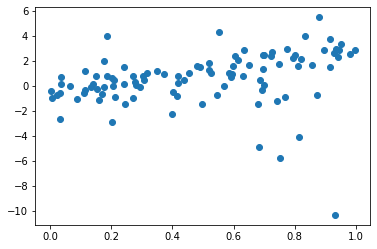

In [2]:
true_weights = 4.0
true_bias = -1.0

# Make the randomness consistent
torch.manual_seed(0)
# Use random x values
x = torch.rand(100)
# Generate random noise, same shape as *x*, that has some outliers.
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)
# For a simpler variant, use  torch.randn_like(x).
#print(f"Noise mean: {noise.mean()}, noise variance {noise.var()}")
# Generate true y values 
y_true = true_weights * x + noise + true_bias
# Make a scatterplot. The semicolon at the end says to ignore the return value.
plt.scatter(x, y_true);

Let's fit a line to that!

In linear regression, we predict an output by computing `y_pred = weights * x + bias`.

This is a one-dimensional problem (each data point has only a single number, *x*), but the intuition we gain here will help us with multiple regression.

In fact, to keep things simple, we're going to start with **bias == 0**: we're only going to fit a slope.

Let's start with an arbitrary value for `weights` and see how it does.

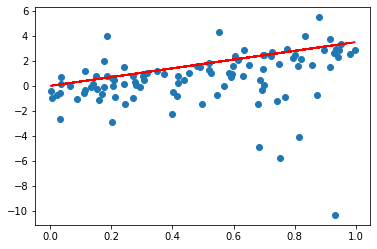

In [4]:
slope = 3.5
bias = 0.0
y_pred = slope * x + bias
plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');

Hm, we're close but not great. The line is *too high*, but we're sticking with a *0 bias* so we can't just shift it down. What change could we make to the slope to get it better?

**Adjust the slope slider below until the line looks like it's fitting the data better.**

In [5]:
@widgets.interact(slope=(-5.0, 5.0))
def plot_linreg(slope):
    y_pred = slope * x + bias
    plt.scatter(x, y_true); plt.plot(x, y_pred, 'r');
    # TODO: have students add this:
    resid = 0.0
    resid = y_pred - y_true
    mse = 0.0 # TODO
    mse = resid.pow(2).mean()
    mae = 0.0 # TODO
    mae = resid.abs().mean()
    print(f"MSE: {mse}, MAE: {mae}")

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

### Loss Functions

Did you get the best value for the slope? What about those outlier points?

Hopefully this has convinced you that it would be a good idea to *quantify* the error. And maybe even that there might be multiple ways to quantify the error, based on whether we care about those outliers or not.

We'll introduce two **loss functions**:

- Mean Squared Error (abbreviated **MSE**, also known as the *L2 norm*): square the residual, take the mean.
- Mean Absolute Error (abbreviated **MAE**, also known as the *L1 norm* or sometimes *mean absolute deviation* (MAD)): flip negative errors to be positive (absolute value), take the mean.

Which one of them is more *sensitive* to outliers? Let's find out.

First: add correct computations of the `mse` and `mae` to the plot function above.
Then: adjust the slider to minimize MSE. Then adjust it to minimize MAE.

How would you describe the difference between the line that minimizes MSE and the line that minimizes MAE?

### Gradient

Estimate the gradient numerically, by hand and then in code.

Explain why the gradient for one parameter may initially seem to go in the wrong direction.

In [18]:
def linreg_mse(slope):
    y_pred = slope * x + 0.0
    return (y_pred - y_true).pow(2).mean()

In [14]:
linreg_mse(0.0)

tensor(490.7277)

In [15]:
linreg_mse(1.4)

tensor(427.4457)

### Gradient Descent

- Contrast the effects of gradient *ascent* and gradient *descent*.
- Descend the estimated gradient until convergence.

In [21]:
linreg_mse(1.4)

tensor(4.2745)

In [22]:
linreg_mse(1.39)

tensor(4.2745)

In [43]:
x0 = 1.39
eps = 1e-4
linreg_mse(x0 + eps) - linreg_mse(x0)

tensor(0.)

### autograd

Use `tensor([3.5], requires_grad=True)`

Then use `loss.backward()`.


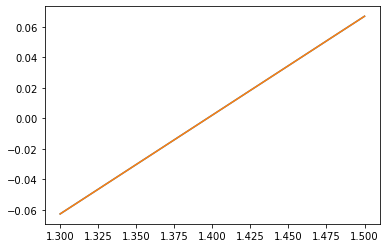

In [67]:
grads = []
grads_numerical = []
grads_central_diff = []
eps = 1e-2
slopes = torch.linspace(1.3, 1.5, 500).numpy()
for ww in slopes:
    w = torch.tensor(ww, requires_grad=True)
    y_pred = w * x
    loss = (y_pred - y_true).pow(2).mean()
    loss.backward()
    grads.append(w.grad)
    grads_numerical.append((linreg_mse(ww + eps) - linreg_mse(ww)) / eps)
    grads_central_diff.append((linreg_mse(ww + eps) - linreg_mse(ww - eps)) / (2*eps))

plt.plot(slopes, torch.stack(grads))
#plt.plot(slopes, grads_numerical)
plt.plot(slopes, grads_central_diff)